<h4>Heart Disease</h4> 
In this notebook, we will attempt to classify indivudials as either having heart disease or not based on several metrics related to health and physical habits.
In the end, we will have built a model that will help us predict heart disease for our patients.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# import data
df = pd.read_csv("heart_disease.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<b>Data Descriptions</b><br>
HeartDisease - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) <br>
BMI - Body Mass Index (BMI) <br>
Smoking - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] <br>
AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week <br>
Stroke - (Ever told) (you had) a stroke? <br>
PhysicalHealth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 <br>
MentalHealth - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? <br>
DiffWalking - Do you have serious difficulty walking or climbing stairs? <br>
Sex - Are you male or female? <br>
AgeCategory - Fourteen-level age category

In [3]:
# take a look at the distribution of the data
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There is no missing data in the dataset :)

<AxesSubplot: xlabel='HeartDisease'>

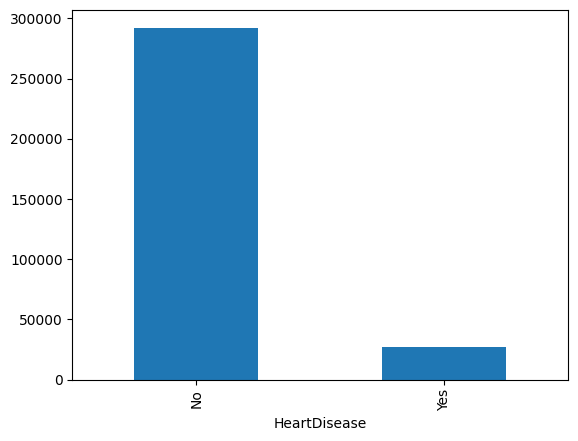

In [5]:
# Check distribution of target variable Heart Disease
df_gb = df.groupby(['HeartDisease']).size()
df_gb.plot(kind = 'bar')

The distribution shows that about 9% of the population in the data set have heart disease

In [6]:
# plot correlation between variables and identify columns that are correlated
corr = df.corr(numeric_only=True) 
corr.style.background_gradient(cmap='coolwarm')

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [7]:
# Identify the number of unique values for each variable in the dataset

# create empty dictionary
feature_dict = {}

# add column and number of unique values of every column
for column_name in df.columns:
    feature = column_name
    unique_vals = len(df[column_name].unique())
    feature_dict[column_name] = unique_vals

# view columns and unique values
feature_dict


{'HeartDisease': 2,
 'BMI': 3604,
 'Smoking': 2,
 'AlcoholDrinking': 2,
 'Stroke': 2,
 'PhysicalHealth': 31,
 'MentalHealth': 31,
 'DiffWalking': 2,
 'Sex': 2,
 'AgeCategory': 13,
 'Race': 6,
 'Diabetic': 4,
 'PhysicalActivity': 2,
 'GenHealth': 5,
 'SleepTime': 24,
 'Asthma': 2,
 'KidneyDisease': 2,
 'SkinCancer': 2}

In [8]:
# separate numeric and categorical variables into their lists

# list of all numeric features
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# list of all categorical features
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

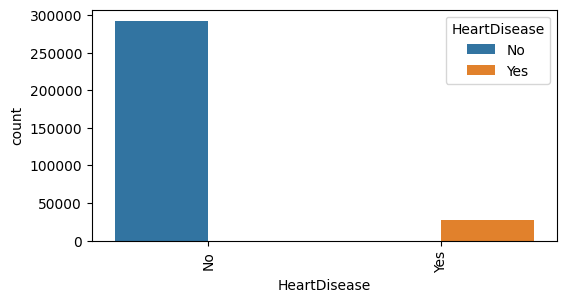

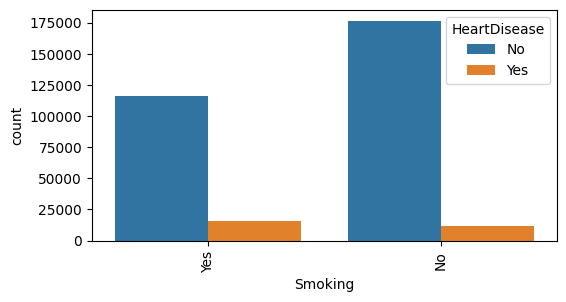

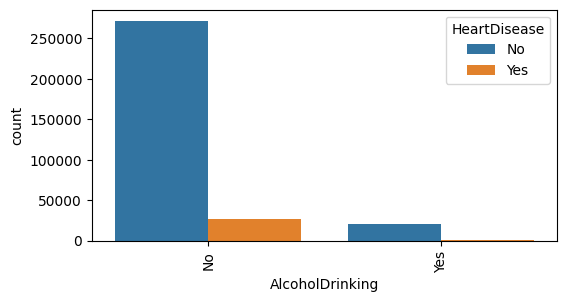

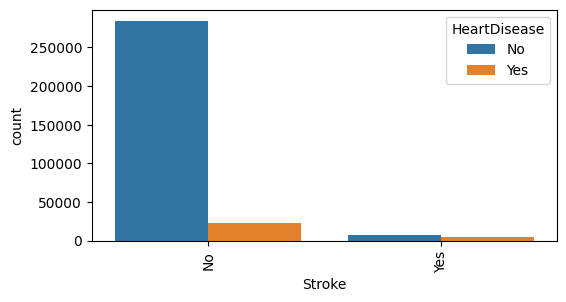

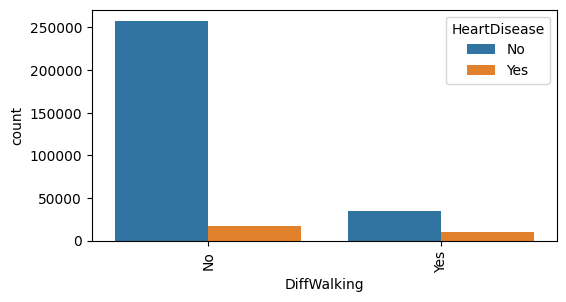

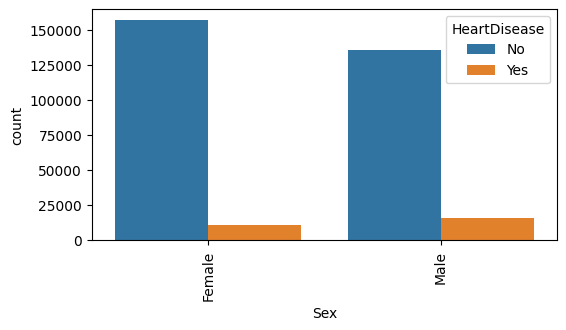

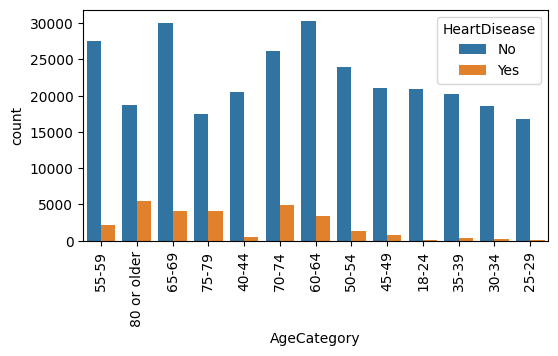

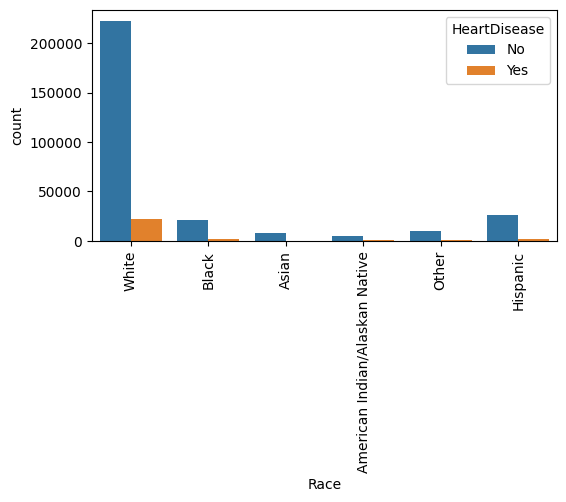

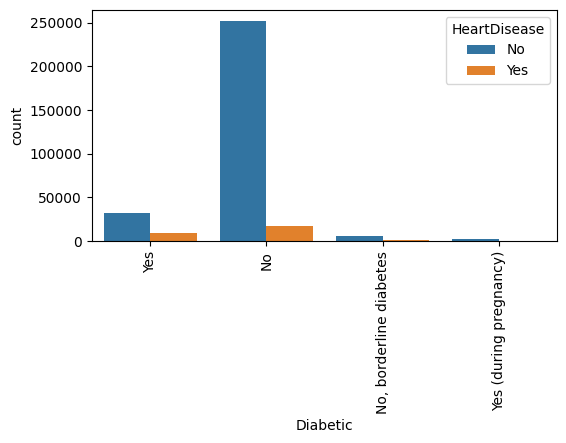

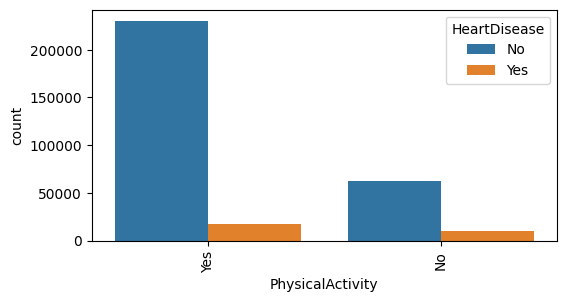

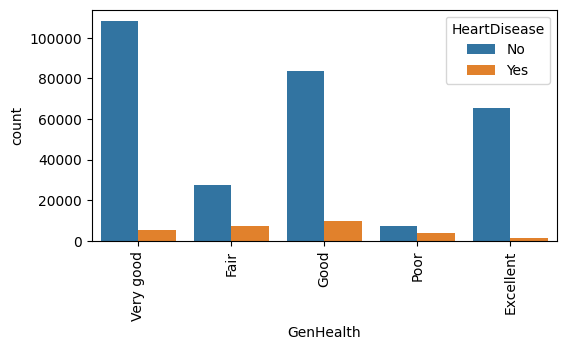

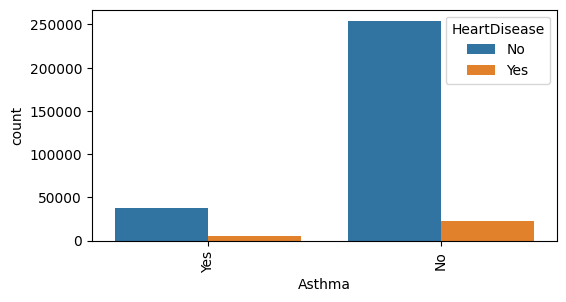

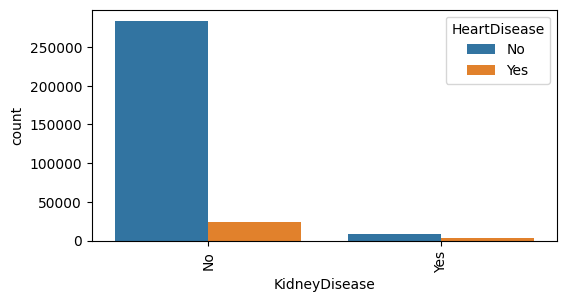

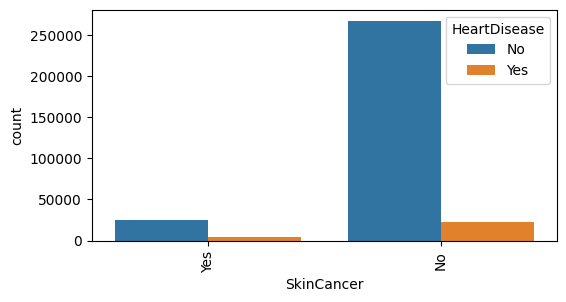

In [9]:
# plot all of the categorical features against the target variable Heart Disease
for feature in categorical_features:
  fig, ax = plt.subplots(figsize=(6,3))
  chart = sns.countplot(ax=ax, x=feature , data=df, hue='HeartDisease')
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Visual Obersvations:
Smoking, stroke, difficulty walking, gender (m), age(50+), physical activity, general health, skin cancer, asthma and kidney disease are contributors

In [10]:
# Convert categorical variables into numeric values

# initiate ordinal encoder to transform categorical features into an integer array
enc = OrdinalEncoder()

# apply fit to categorical variables
enc.fit(df[categorical_features])

# apply transformation to categorical variables
df[categorical_features] = enc.transform(df[categorical_features])

# observe categorical features no longer retain their original values, but instead are transformed into numeric versions
df[categorical_features].head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0


In [11]:
# extract feature variables
X = df.drop("HeartDisease", axis=1)

# extract target variable
y = df["HeartDisease"]

# print variable types
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [12]:
# split data into training and test sets, fit the data and create predictions on test set 

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# instantiate logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=500)

# fit logistic regression model to training data
logreg.fit(X_train, y_train)

# create probability predictions w knowledge from training data onto the test set
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# create classification predictions w knowledge from training data onto the test set (the previous step has probabilities, while this step has the classification)
y_pred = logreg.predict(X_test)

# print out preview of last 10 values
print(y_pred_probs[:10])
print(y_pred[:10])

[0.00685034 0.00718012 0.02008941 0.08621082 0.28153735 0.17869608
 0.01666169 0.003615   0.18838362 0.1801889 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


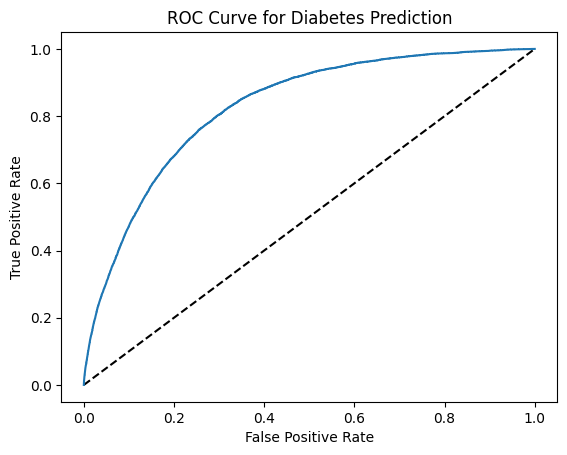

In [13]:
# generate ROC curve values: false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# generate plot of x and y axis from 0 to 1 and a dashed diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# plot true positive rate against false positive rate
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The ROC Curve gives us an indication of how much of a trade off we should expect for our predictions. <br>
It compares the false positive rate against the true positive rate. <br>
The diagonal line is what we would expect to happen if our predictions had a roughly 50/50 chance of being right. <br>
In our case, we can see that for example, at a 40% false positive rate, we can expect an approximate 85% true positive rate. <br>
The higher the curve, the better the performance of the model.

In [14]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8258426646661076
[[86939   710]
 [ 7567   723]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     87649
         1.0       0.50      0.09      0.15      8290

    accuracy                           0.91     95939
   macro avg       0.71      0.54      0.55     95939
weighted avg       0.88      0.91      0.88     95939



An Area Under the Curve (AUC) score closer to 1 performs best. <br>
In our case, the AUC score is 0.83, indicating a well performing model. <br>
Our precision is at 50% indicating that our predictions for heart disease are correct 50% of the time leaving room for improvement for our predictions. <br>
Our recall is at 9% indicating that we have correctly predicted 9% of all the heart disease patients in our data set. <br>

<b>To improve our model:</b><br>
We could try:

1) Resampling: Oversampling our target variable to balance the data.
2) F1: Place emphasis on our F1 score
3) Use ensemble methods: Ensemble methods like bagging, boosting, and stacking can improve the performance of models on imbalanced data sets.